In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_raw_corrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid.nc')
age_data_raw_uncorrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")
age_model_40 = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [3]:
H_data = H_data_40["H"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert"].data
age_c_uncert_real_data = age_data_40["age_c_uncert_unbounded"].data
age_c_model = age_model_40["age_c"].data

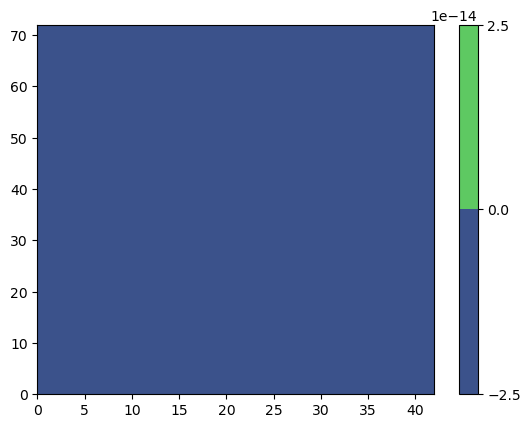

In [4]:
plt.contourf(age_c_model[-1]*(H_data >= 2000))
plt.colorbar()

In [5]:
# Cannot use 1500, have to use 2000 for masking. This should make it obvious why.
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 1500.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([2.81456511e+04, 2.71071812e+04, 2.55873724e+04, 2.40487804e+04,
        2.25967021e+04, 2.12715736e+04, 2.00490860e+04, 1.89016317e+04,
        1.77909944e+04, 1.66633134e+04, 1.51539310e+04, 1.36729193e+04,
        1.22465931e+04, 1.08457014e+04, 9.46820876e+03, 8.16026331e+03,
        7.00009214e+03, 5.92381837e+03, 4.93451548e+03, 4.14454452e+03,
        3.53340344e+03, 3.06159638e+03, 2.70842201e+03, 2.42788070e+03,
        2.15230853e+03, 1.94873711e+03, 1.77359220e+03, 1.64602193e+03,
        1.54805181e+03, 1.64804108e+03, 1.49783201e+03, 1.39667979e+03,
        1.35190652e+03, 1.38839804e+03, 1.34621561e+03, 1.33789418e+03,
        1.36987668e+03, 1.46090084e+03, 1.48154541e+03, 1.48971476e+03,
        1.52833428e+03, 1.61081872e+03, 1.61822718e+03, 1.64273383e+03,
        1.69345302e+03, 1.74660964e+03, 1.76546028e+03, 1.80518994e+03,
        1.85764726e+03, 1.87528663e+03, 1.90808408e+03, 1.94851446e+03,
        1.97095114e+03, 2.00731073e+03, 2.04413817e+03, 2.076905

In [6]:
# Cannot use 1500, have to use 2000 for masking. This should make it obvious why.
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 1500.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([2.76656018e+04, 2.66409249e+04, 2.51080806e+04, 2.36368251e+04,
        2.22397380e+04, 2.09600489e+04, 1.97851336e+04, 1.86782509e+04,
        1.75974071e+04, 1.64892585e+04, 1.49936867e+04, 1.35202087e+04,
        1.20968801e+04, 1.06906823e+04, 9.29582258e+03, 7.96584119e+03,
        6.75925992e+03, 5.63696631e+03, 4.62719088e+03, 3.81385669e+03,
        3.16858303e+03, 2.66535890e+03, 2.27761808e+03, 1.97508253e+03,
        1.69162528e+03, 1.45859873e+03, 1.27690528e+03, 1.14960051e+03,
        1.05073596e+03, 1.11248963e+03, 1.00258155e+03, 9.29724942e+02,
        9.21646724e+02, 1.00042807e+03, 9.77845070e+02, 9.91184135e+02,
        1.05148414e+03, 1.17761879e+03, 1.21710779e+03, 1.25306942e+03,
        1.33115773e+03, 1.45581900e+03, 1.50329078e+03, 1.57101761e+03,
        1.67396908e+03, 1.74660964e+03, 1.76546028e+03, 1.80518994e+03,
        1.85764726e+03, 1.87528663e+03, 1.90808408e+03, 1.94851446e+03,
        1.97095114e+03, 2.00731073e+03, 2.04413817e+03, 2.076905

In [7]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([15865.34790781, 15431.71771128, 14633.05132964, 13817.55834949,
        13000.75431238, 12288.19830087, 11674.07327038, 11141.40808143,
        10674.77658555, 10240.90361517,  9688.24962145,  9061.12555845,
         8340.07606964,  7515.75473335,  6614.80253088,  5710.02160788,
         4867.24583911,  4068.63270496,  3344.10219473,  2759.13955236,
         2294.08944203,  1929.32228329,  1644.14567831,  1418.38722989,
         1203.77066751,  1025.86909116,   882.91418552,   774.80324263,
          689.74627524,   779.24814207,   688.6559414 ,   620.31407636,
          597.83700607,   639.85026748,   599.4390132 ,   581.27223112,
          589.29318848,   636.4412882 ,   631.41939546,   623.54416474,
          643.57046281,   683.79530725,   696.0815412 ,   720.03238174,
          765.86392034,   780.37075572,   761.43289103,   751.97318099,
          749.66460986,   732.06120923,   720.05233472,   710.81935134,
          693.3627402 ,   679.02820441,   665.59441435,   651.24

In [8]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([16273.13556073, 15829.06882737, 15047.89149406, 14164.11286104,
        13311.00526316, 12558.50878735, 11902.4621167 , 11334.90836205,
        10843.39826036, 10393.02263351,  9829.75046222,  9196.70096465,
         8472.43116938,  7653.89353475,  6769.75065215,  5885.05150607,
         5086.84860263,  4325.96404944,  3618.90013901,  3055.30415765,
         2621.34363055,  2283.76900301,  2030.82796258,  1824.83782149,
         1621.97746217,  1471.87563355,  1333.99705022,  1230.03899787,
         1144.40350751,  1270.33877466,  1144.75494622,  1052.79518005,
          998.95909081,  1003.06860578,   946.3340602 ,   910.1601803 ,
          896.20698883,   913.60731803,   891.38012272,   857.76682538,
          838.29999264,   838.79502599,   811.01794923,   791.74860436,
          785.3478579 ,   780.37075572,   761.43289103,   751.97318099,
          749.66460986,   732.06120923,   720.05233472,   710.81935134,
          693.3627402 ,   679.02820441,   665.59441435,   651.24

In [9]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_real_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio_real = mask*age_c_data/age_c_uncert_real_data
field_real = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_real_data**2

np.sum(field_real, axis = (1,2)), np.sum(field_real), np.max(mask*age_c_data/age_c_uncert_real_data)

(array([415403.88654139, 406509.18057936, 387968.43417954, 368011.93356658,
        348511.91560061, 331224.67562086, 315838.15944047, 302086.58340915,
        289570.60027497, 277271.64570325, 263748.19853865, 247637.3408655 ,
        228062.70374588, 205007.92393158, 179548.29929234, 153737.01612191,
        129522.29470889, 107970.39577509,  89554.44415964,  74403.35747449,
         62137.81648391,  52281.69634493,  44360.40742783,  37944.14290936,
         32547.66378154,  28050.05784874,  24394.21124951,  21487.95540834,
         19184.69392558,  19736.38789422,  16710.55380903,  14247.45758683,
         12645.75205408,  12183.72066818,  10835.67350843,   9938.71346331,
          9618.66602309,   9927.74826889,   9682.55861601,   9551.26086307,
          9844.11937047,  10451.34216826,  10597.24563012,  11094.67426574,
         11919.4615285 ,  12317.0931848 ,  12210.52495101,  12350.66127882,
         12643.21645749,  12315.61422918,  12133.80738843,  12003.864348  ,
         115

In [10]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_real_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio_real = mask*age_c_data/age_c_uncert_real_data
field_real = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_real_data**2

np.sum(field_real, axis = (1,2)), np.sum(field_real), np.max(mask*age_c_data/age_c_uncert_real_data)

(array([420275.17219375, 411221.87356416, 392654.58020346, 371780.92310206,
        351904.70490884, 334182.61653985, 318343.96915383, 304176.78365165,
        291347.52742986, 278848.54753555, 265223.67069845, 249031.11577418,
        229435.10907121, 206478.70943992, 181249.02068902, 155670.18761865,
        131863.80129337, 110827.31131453,  92609.66868837,  77825.4008381 ,
         65975.20596769,  56438.97288674,  48972.16767252,  42899.66022679,
         37667.87153599,  33507.71730461,  29954.50740156,  27199.36712271,
         25099.52270511,  26123.60506455,  22449.02731331,  19701.26422677,
         17828.02309692,  16925.04318117,  15380.68756747,  14328.8544589 ,
         13745.61267392,  13683.90796296,  13148.49464626,  12593.31535972,
         12306.66327587,  12349.75060024,  12065.13433393,  11966.05461248,
         12140.22523504,  12317.0931848 ,  12210.52495101,  12350.66127882,
         12643.21645749,  12315.61422918,  12133.80738843,  12003.864348  ,
         115

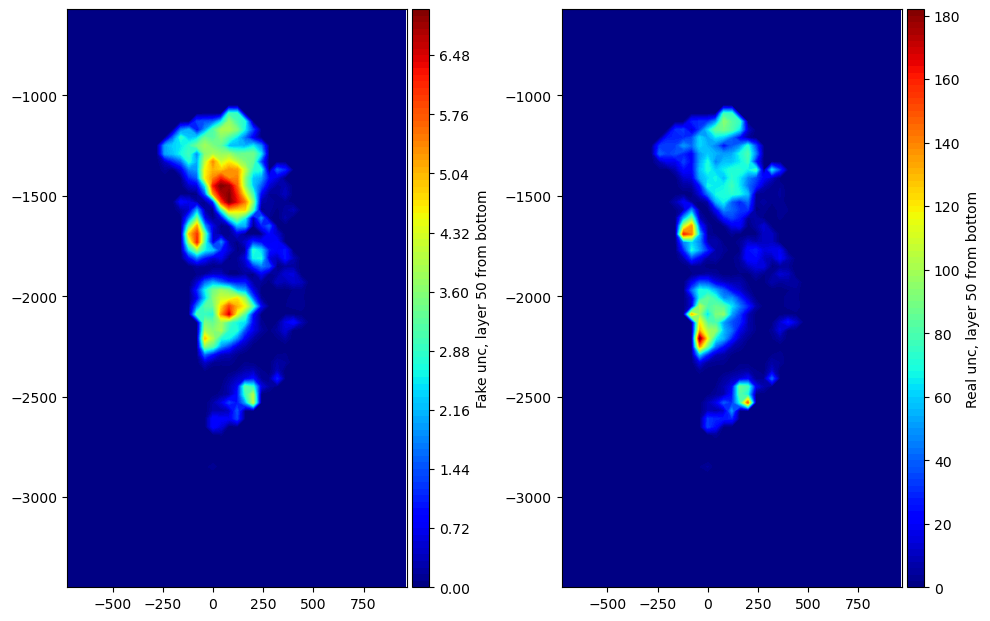

In [11]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 50 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 50 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()

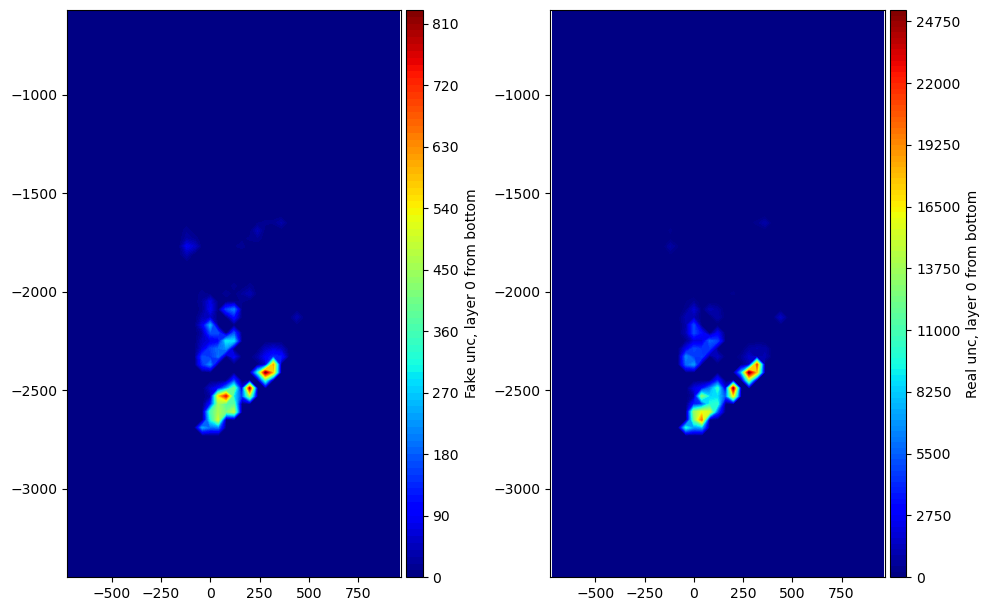

In [12]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[0],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 0 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[0],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 0 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()

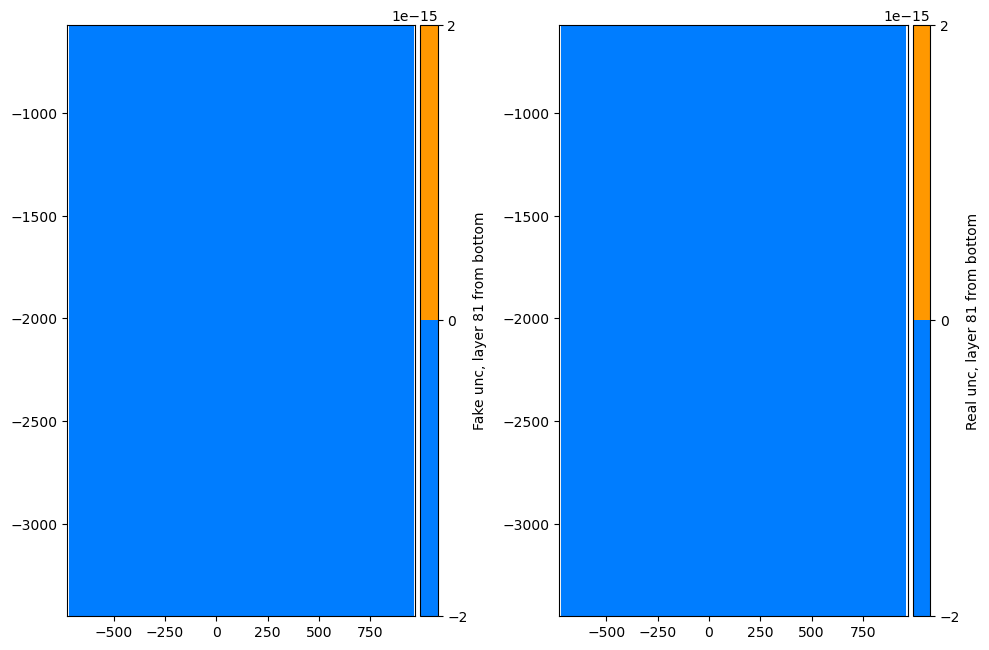

In [13]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[-1],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 81 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[-1],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 81 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()